In [1]:
import cartopy
import GMesh
import importlib
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

# Create a target grid

This creates a regular spherical (geographic) grid covering the Cape Cod between 7$^\circ$W and 42$^\circ$E, 30$^\circ$N and 48$^\circ$N, with 1$^\circ$ spacing in both directions.

<GMesh nj:7 ni:10 shape:(7,10)>


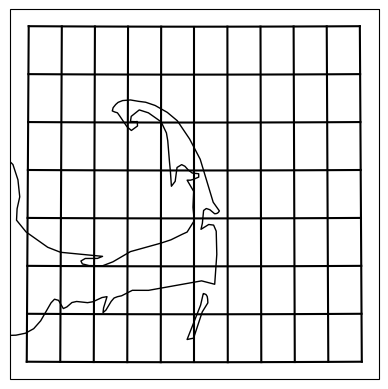

In [2]:
importlib.reload(GMesh)
target_mesh = GMesh.GMesh( lon=np.linspace(-70.5, -69.5, 11), lat=np.linspace(41.5, 42.25, 8) )
ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=-70, central_latitude=42))
ax.coastlines()
target_mesh.plot(ax, transform=cartopy.crs.Geodetic())
print( target_mesh )

Refine by factor of two and plot

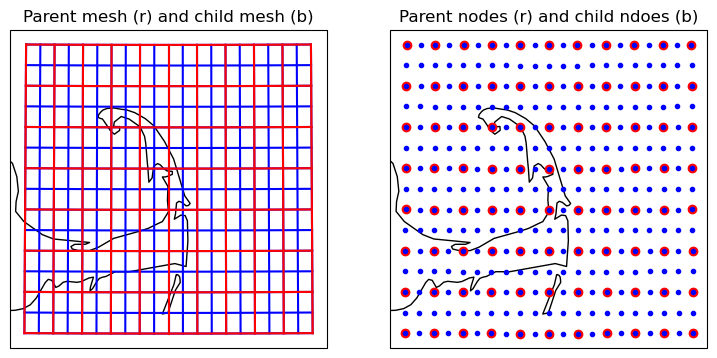

In [3]:
refined_mesh = target_mesh.refineby2()

plt.figure(figsize=(9,5))
ax = plt.subplot(121, projection=cartopy.crs.NearsidePerspective(central_longitude=-70, central_latitude=42))
ax.coastlines()
refined_mesh.plot(ax, linecolor='b', transform=cartopy.crs.Geodetic())
target_mesh.plot(ax, linecolor='r', transform=cartopy.crs.Geodetic())
plt.title('Parent mesh (r) and child mesh (b)');

ax = plt.subplot(122, projection=cartopy.crs.NearsidePerspective(central_longitude=-70, central_latitude=42))
ax.coastlines()
ax.plot( target_mesh.lon , target_mesh.lat, 'ro', transform=cartopy.crs.Geodetic());
ax.plot( refined_mesh.lon , refined_mesh.lat, 'b.', transform=cartopy.crs.Geodetic());
plt.title('Parent nodes (r) and child ndoes (b)');

Do the same over Indonesia between 90$^\circ$E--120$^\circ$E, 12$^\circ$S--12$^\circ$N.

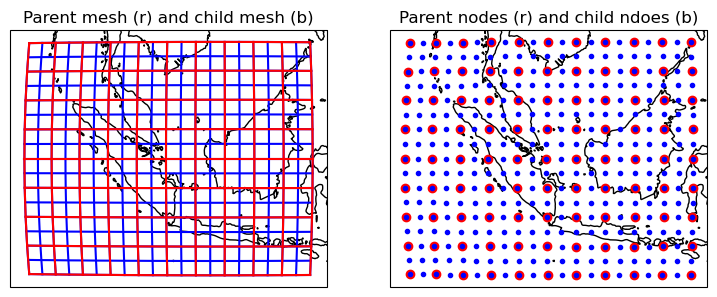

In [4]:
target_mesh = GMesh.GMesh( lon=np.linspace(90, 120, 11), lat=np.linspace(-12, 12, 9) )
refined_mesh = target_mesh.refineby2()

plt.figure(figsize=(9,5))
ax = plt.subplot(121, projection=cartopy.crs.NearsidePerspective(central_longitude=110, central_latitude=0))
ax.coastlines()
refined_mesh.plot(ax, linecolor='b', transform=cartopy.crs.Geodetic())
target_mesh.plot(ax, linecolor='r', transform=cartopy.crs.Geodetic())
plt.title('Parent mesh (r) and child mesh (b)');

ax = plt.subplot(122, projection=cartopy.crs.NearsidePerspective(central_longitude=110, central_latitude=0))
ax.coastlines()
ax.plot( target_mesh.lon , target_mesh.lat, 'ro', transform=cartopy.crs.Geodetic());
ax.plot( refined_mesh.lon , refined_mesh.lat, 'b.', transform=cartopy.crs.Geodetic());
plt.title('Parent nodes (r) and child ndoes (b)');

Make a patch on the Equator 12$^\circ$W--12$^\circ$E, 15$^\circ$S--15$^\circ$N) and rotate it to over the North Pole (tests refinement across the singularity)

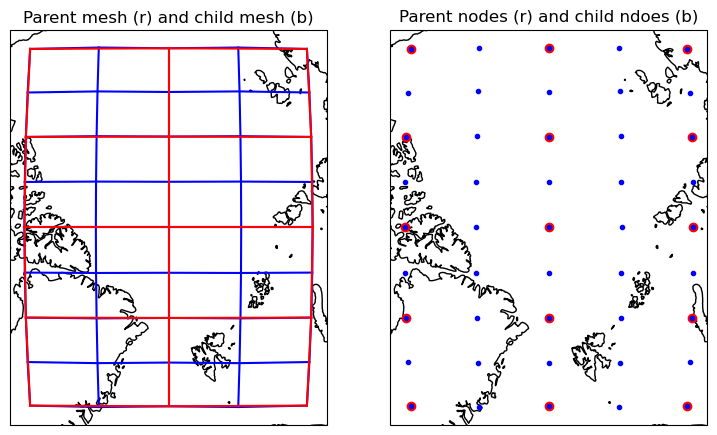

In [5]:
target_mesh = GMesh.GMesh( lon=np.linspace(-12, 12, 3), lat=np.linspace(-15, 15, 5) )
target_mesh.rotate(y_rot=-90)
refined_mesh = target_mesh.refineby2()

plt.figure(figsize=(9,9))
ax = plt.subplot(121, projection=cartopy.crs.NearsidePerspective(
    central_longitude=target_mesh.lon[2,1], central_latitude=target_mesh.lat[2,1]))
ax.coastlines()
refined_mesh.plot(ax, linecolor='b', transform=cartopy.crs.Geodetic())
target_mesh.plot(ax, linecolor='r', transform=cartopy.crs.Geodetic())
plt.title('Parent mesh (r) and child mesh (b)');

ax = plt.subplot(122, projection=cartopy.crs.NearsidePerspective(
    central_longitude=target_mesh.lon[2,1], central_latitude=target_mesh.lat[2,1]))
ax.coastlines()
for i in range(target_mesh.lon.size):
  ax.plot( target_mesh.lon.flatten()[i] , target_mesh.lat.flatten()[i], 'ro', transform=cartopy.crs.Geodetic())  
for i in range(refined_mesh.lon.size):
  ax.plot( refined_mesh.lon.flatten()[i] , refined_mesh.lat.flatten()[i], 'b.', transform=cartopy.crs.Geodetic())  
plt.title('Parent nodes (r) and child ndoes (b)');